In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_thcv_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..THCV
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.030928
1,1,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0.030928
2,4,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.030928
3,7,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,1,1,0.030928
4,11,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0.030928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639
74996,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639
74997,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639
74998,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,0.154639


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..THCV', 'index'], axis = 1)
y = df_knn[['X..THCV']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.03092784],
       [0.03092784],
       [0.03092784],
       ...,
       [0.15463918],
       [0.15463918],
       [0.15463918]])

<AxesSubplot:ylabel='Count'>

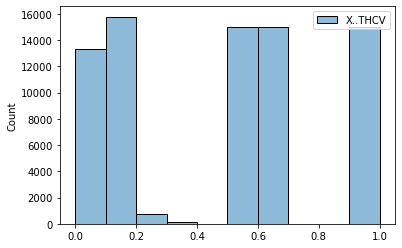

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.02672386852132213

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9308997925160454

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.9125269630504408

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([1.79580227e-04, 3.79851629e-05, 8.67011469e-05, 8.30698207e-04,
       1.93190151e-03, 5.44352937e-04, 1.57899879e-04, 1.21890631e-03,
       3.72288846e-05, 4.09097474e-05, 1.14594227e-04, 1.26293757e-03,
       5.58268930e-05, 1.07502652e-03, 1.64563898e-04, 2.21880520e-05,
       5.96079183e-05, 8.25250219e-05, 2.47455914e-05, 7.91225628e-04,
       8.84818286e-04, 7.82216377e-04, 2.19055717e-04, 9.94387437e-04,
       5.07264042e-04, 6.37850148e-06, 5.17564288e-03, 1.41032161e-05,
       2.08032227e-03, 1.18029877e-03, 1.08317174e-03, 6.81491687e-05,
       8.89026715e-05, 7.21926494e-06, 2.70642513e-04, 5.06779854e-05,
       4.08433816e-05, 1.18031739e-03, 6.31709092e-06, 4.10985119e-04,
       7.79489608e-05, 1.39711821e-04, 1.07867824e-04, 4.29137631e-03,
       1.83456198e-05, 2.44888115e-04, 5.78780410e-04, 1.46696003e-05,
       3.91051918e-04, 1.68728956e-05, 5.00805296e-05, 2.91030144e-03,
       8.66497257e-04, 3.30681454e-05, 1.15417219e-04, 2.26797186e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_26,tfidf_43,tfidf_51,tfidf_78,tfidf_80,tfidf_82,tfidf_93,tfidf_97,tfidf_117,tfidf_119,...,apple,cheese,citrus,diesel,earthy,grape,lime,orange,pungent,sweet
0,0.0,0.000000,0.0,0.152565,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.000000,0.0,0.000000,0.0,0.0,0.253181,0.0,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,0
2,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.16079,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.205162,0.0,0.000000,0.0,0.0,0.000000,0.0,0.140663,0.00000,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,1,1,1,1,1,1,1,1,1,1
74996,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,1,1,1,1,1,1,1,1,1,1
74997,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,1,1,1,1,1,1,1,1,1,1
74998,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.00000,...,1,1,1,1,1,1,1,1,1,1


In [21]:
selected_X.columns.to_list()

['tfidf_26',
 'tfidf_43',
 'tfidf_51',
 'tfidf_78',
 'tfidf_80',
 'tfidf_82',
 'tfidf_93',
 'tfidf_97',
 'tfidf_117',
 'tfidf_119',
 'tfidf_121',
 'tfidf_141',
 'tfidf_145',
 'tfidf_149',
 'tfidf_160',
 'tfidf_161',
 'tfidf_162',
 'tfidf_163',
 'tfidf_165',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_199',
 'tfidf_200',
 'tfidf_202',
 'tfidf_207',
 'tfidf_234',
 'tfidf_235',
 'tfidf_236',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_281',
 'tfidf_285',
 'tfidf_288',
 'tfidf_291',
 'tfidf_304',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_329',
 'tfidf_345',
 'tfidf_355',
 'tfidf_357',
 'tfidf_358',
 'tfidf_374',
 'tfidf_376',
 'tfidf_386',
 'hybrid',
 'creative',
 'euphoric',
 'focused',
 'giggly',
 'hungry',
 'sleepy',
 'tingly',
 'apple',
 'cheese',
 'citrus',
 'diesel',
 'earthy',
 'grape',
 'lime',
 'orange',
 'pungent',
 'sweet']

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_thcv.pkl")
joblib.dump(selector, "selector_knn_tfidf_thcv.pkl")

['selector_knn_tfidf_thcv.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.018970542975542976

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.005567327986309964

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.07461452932445506

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9633268457461412

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.954713218228296

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.01417842407969032

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.004960576036830661

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.07043135691459211

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9743654461168413

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9596487713685444

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_thcv.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_thcv.pkl")

['y_test_knreg_tfidf_thcv.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.013921216321020818

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.9606002342691523

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.004777057887974507

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.06911626355623188

In [47]:
y_test

,X..THCV
11591,0.226804
52020,1.000000
34666,0.680412
22169,0.103093
23049,0.154639
...,...
60863,1.000000
32316,0.680412
60933,0.010309
43206,0.158076


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

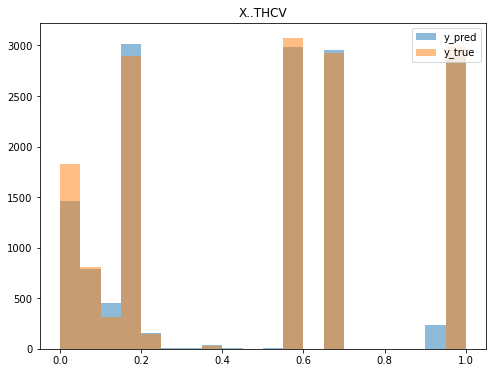

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..THCV"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_thcv.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.980
P-value: 0.000


<AxesSubplot:>

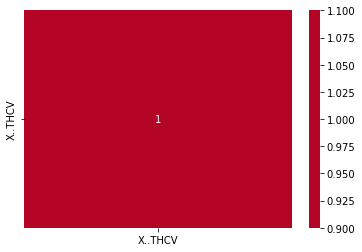

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)